In [8]:
import numpy as np
from random import choices, randrange
import random
import matplotlib.pyplot as plt
from numba import njit
from random import randint


def init_population(n_ind, N, K):
    pop = []
    for i in range(n_ind):
        pop.append(np.random.randint(K, size = N))
    return pop


@njit
def eval_sol(sol, K, problem):
    centroids = np.zeros((K,2))
    num_elems = np.zeros(K)
    for elem,cluster in enumerate(sol):
        cluster = int(cluster)
        elem = int(elem)
        centroids[cluster] = centroids[cluster] + problem[elem]
        num_elems[cluster] = num_elems[cluster] + 1

    for i in range(len(centroids)):
        centroids[i] = centroids[i]/num_elems[i]
    
    tot_distance = 0

    for elem,cluster in enumerate(sol):
        cluster = int(cluster)
        elem = int(elem)
        tot_distance = np.linalg.norm( centroids[cluster] - problem[elem] ) + tot_distance

    return tot_distance


@njit
def breed_sol(parent1, parent2, K, b):
    nPoints = len(parent1)
    child = np.zeros(nPoints)
    n = randrange(nPoints-1)
    child[:n] = parent1[:n]
    child[n+1:] = parent2[n+1:]


    for i in range(len(child)):
        r = random.uniform(0,1)
        if(r < b):
            child[i] = randrange(K)
    return child



def genetic_clustering(problem, K):
    N = 100
    nPoints = len(problem)
    population = init_population(N, nPoints, K)
    
    best_fitness = -1
    
    best_solution = population[0]

    no_changes = 0
    gen = 0
    finito = False
    while(finito == False):
        old_best = best_fitness
        vals = np.zeros(N)
        for i,elem in enumerate(population):
            vals[i] = eval_sol(elem,K,points)
            if vals[i]<best_fitness or best_fitness == -1:
                best_fitness = vals[i]
                best_solution = elem
            
        if(old_best == best_fitness):
            no_changes = no_changes+1
        else:
            no_changes = 0

        min_val = np.min(vals)
        av_vals = np.sum(vals)/len(vals)
        print("Generation number: {}, Best fitness: {}, Average fitness: {}".format(gen, min_val, av_vals))

        new_pop = []
        
        sorted_pop = [x for _, x in sorted(zip(vals, population),  key=lambda pair: pair[0])]

        for i in range(round(N/2)):
            parent1, parent2 = sorted_pop[i], sorted_pop[i+1]
            new_pop.append(breed_sol(parent1, parent2, K, 0.01))
        
        saved_pop = []
        for i in range(round(N/2)):
            saved_pop.append(sorted_pop[i])
        new_pop.extend(saved_pop)
        population = new_pop
        gen = gen + 1

        if(no_changes == 50):
            return best_solution


In [9]:
def load_points(file):
    f = open(file, 'r')
    points = []

    for i,line in enumerate(f.readlines()):
        nums = line.split(" ")
        coords = []
        for num in nums:
            if num != "":
                coords.append(float(num))
        coords = np.array(coords)
        points.append(coords)

    points = np.array(points)
    f.close()
    return points

In [10]:
points = load_points('C:/Users/franc/Desktop/prova.txt')

K = 15
N = len(points)
sol = genetic_clustering(points, K)

Generation number: 0, Best fitness: 1597552960.1708286, Average fitness: 1599626244.314839
Generation number: 1, Best fitness: 1597552960.1708286, Average fitness: 1599029648.5454366
Generation number: 2, Best fitness: 1596744029.054236, Average fitness: 1598605618.1051984
Generation number: 3, Best fitness: 1596284599.5803223, Average fitness: 1598227704.4904425
Generation number: 4, Best fitness: 1596284599.5803223, Average fitness: 1598095985.1668038
Generation number: 5, Best fitness: 1595303912.1691802, Average fitness: 1597885559.4950461
Generation number: 6, Best fitness: 1595303912.1691802, Average fitness: 1597763827.9019666
Generation number: 7, Best fitness: 1595303912.1691802, Average fitness: 1597583566.8367078
Generation number: 8, Best fitness: 1595028281.4391725, Average fitness: 1597374757.5239272
Generation number: 9, Best fitness: 1594348006.8952684, Average fitness: 1597180224.1034746
Generation number: 10, Best fitness: 1594348006.8952684, Average fitness: 15970630

In [11]:
print(N)

5000


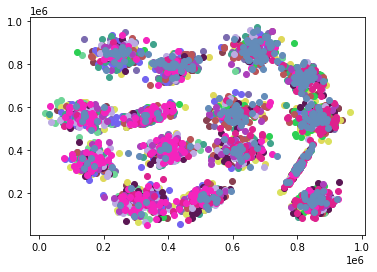

In [19]:
colors = []
for i in range(K):
    colors.append('#%06X' % randint(0, 0xFFFFFF))


clusters = []

for i in range(K):
    cluster = []
    for j in range(N):
        if(sol[j]==i):
            cluster.append(points[j].copy())
    cluster = np.array(cluster)
    clusters.append(cluster)


for i in range(K):
    to_draw = clusters[i]
    plt.scatter(to_draw[:,0], to_draw[:,1], color = colors[i])

#print("{:.5E}".format(eval_sol(sol, points, 5)))